In [2]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 1.4MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=06eb717c46f3f0000a2bd02a86b454093479e70511ab95dda254b2594ee27ee9
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


Utilizaremos la librería scikit-fuzzy para resolver el ejercicio 10 de la guia 3.

En primer lugar importaremos las librería necesarias. Luego, estableceremos los rangos de las variables con las que trabajaremos y los casos particulares que luego evaluaremos.

In [0]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

edad = ctrl.Antecedent(np.arange(1, 100, 1), 'edad')
colesterol = ctrl.Antecedent(np.arange(0, 300, 10), 'colesterol')
riesgo = ctrl.Consequent(np.arange(0, 100, 1), 'riesgo')

edades = [5, 12, 22, 28, 35, 45, 65, 85, 70]
colesteroles = [150, 170, 200, 220, 150, 170, 200, 220, 300]

Aquí definiremos la función de pertenencia de la categoría "edad" con cada uno de sus respectivos rangos y graficaremos para tener una idea de los resultados.

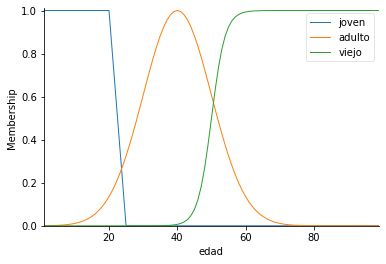

In [17]:
edad['joven'] = fuzz.trapmf(edad.universe,[0, 0, 20, 25])
edad['adulto'] = fuzz.gaussmf(edad.universe, 40, 10)
edad['viejo'] = fuzz.sigmf(edad.universe, 50, 0.5)
edad.view()

Aquí definiremos la función de pertenencia de la categoría "colesterol" con cada uno de sus respectivos rangos y graficaremos para tener una idea de los resultados.

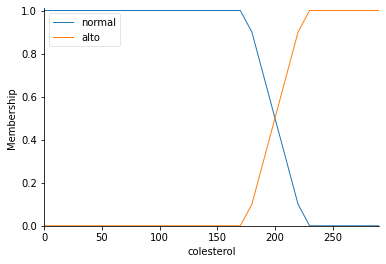

In [18]:
colesterol['normal'] = fuzz.trapmf(colesterol.universe, [0, 0, 175, 225])
colesterol['alto'] = fuzz.trapmf(colesterol.universe, [175, 225, 300, 300])
colesterol.view()

Aquí definiremos la función de pertenencia de la categoría "riesgo" con cada uno de sus respectivos rangos y graficaremos para tener una idea de los resultados.

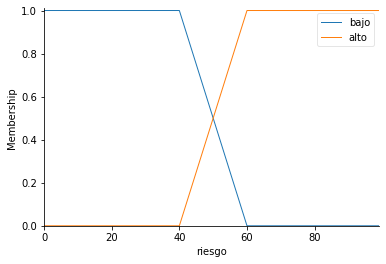

In [19]:
riesgo['bajo'] = fuzz.trapmf(riesgo.universe, [0, 0, 40, 60])
riesgo['alto'] = fuzz.trapmf(riesgo.universe, [40, 60, 100, 100])
riesgo.view()

Aquí definiremos las reglas y las consecuencias para cada una de ellas. Luego definiremos el sistema de control y el objeto de simulación.
También graficamos los árboles para cada unas de las reglas.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0dd1356cc0>)

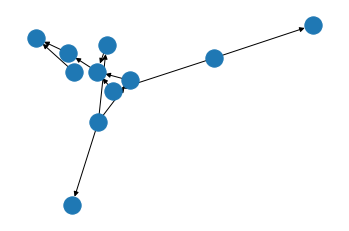

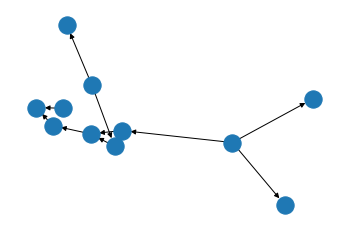

In [22]:
rule1 = ctrl.Rule((edad['adulto'] | edad['viejo']) & colesterol['alto'], riesgo['alto'])
rule2 = ctrl.Rule(edad['joven'] | colesterol['normal'], riesgo['bajo'])

risking_ctrl = ctrl.ControlSystem([rule1, rule2])
risking = ctrl.ControlSystemSimulation(risking_ctrl)

rule1.view()
rule2.view()

Por último, utilizando todas las definiciones anteriores calcularemos el riego para cada uno de los casos de "Edades" y "Colesteroles" que pide la consigna informando los resultados en cada caso.

In [21]:
for i in range(len(edades)):
  risking.input['edad'] = edades[i]
  risking.input['colesterol'] = colesteroles[i]
  risking.compute()
  print("El paciente con la edad:",edades[i],"y un colesterol de ",colesteroles[i],"mHg, tiene un resgo de un",risking.output['riesgo'],"%")

#riesgo.view(sim=risking)

El paciente con la edad: 5 y un colesterol de  150 mHg, tiene un resgo de un 25.33333333333335 %
El paciente con la edad: 12 y un colesterol de  170 mHg, tiene un resgo de un 25.33333333333335 %
El paciente con la edad: 22 y un colesterol de  200 mHg, tiene un resgo de un 37.398106322573206 %
El paciente con la edad: 28 y un colesterol de  220 mHg, tiene un resgo de un 64.94558095944197 %
El paciente con la edad: 35 y un colesterol de  150 mHg, tiene un resgo de un 25.33333333333335 %
El paciente con la edad: 45 y un colesterol de  170 mHg, tiene un resgo de un 25.33333333333335 %
El paciente con la edad: 65 y un colesterol de  200 mHg, tiene un resgo de un 49.5 %
El paciente con la edad: 85 y un colesterol de  220 mHg, tiene un resgo de un 69.28547182620508 %
El paciente con la edad: 70 y un colesterol de  300 mHg, tiene un resgo de un 74.15967098943905 %
